In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
%matplotlib inline

from GDELT_utils import columns, usecols, dtype_dict, cameo_dict, map_cameo_to_text, state_dict

In [2]:
data_2008 = "D:/GDELT.MASTERREDUCEDV2.1979-2013/200811.CSV"
data_2016 = "D:/GDELT.MASTERREDUCEDV2.1979-2013/20161108.export.CSV"

In [3]:
columns[49]

'ActionGeo_Type'

In [4]:
df_2008 = pd.read_csv(data_2008, sep='\t', names=columns[:57], \
                      usecols=usecols, dtype=dtype_dict, parse_dates=['SQLDATE'])
df_2016 = pd.read_csv(data_2016, sep='\t', names=columns, \
                      usecols=usecols, dtype=dtype_dict, parse_dates=['SQLDATE'])

In [5]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [6]:
print(mem_usage(df_2008))
print(mem_usage(df_2016))

730.73 MB
142.42 MB


In [7]:
df_2008_us = df_2008[df_2008['ActionGeo_CountryCode'] == 'US']
df_2016_us = df_2016[df_2016['ActionGeo_CountryCode'] == 'US']

In [8]:
df_2008_us['SQLDATE'].unique()

array(['2008-11-01T00:00:00.000000000', '2008-11-02T00:00:00.000000000',
       '2008-11-03T00:00:00.000000000', '2008-11-04T00:00:00.000000000',
       '2008-11-05T00:00:00.000000000', '2008-11-06T00:00:00.000000000',
       '2008-11-07T00:00:00.000000000', '2008-11-08T00:00:00.000000000',
       '2008-11-09T00:00:00.000000000', '2008-11-10T00:00:00.000000000',
       '2008-11-11T00:00:00.000000000', '2008-11-12T00:00:00.000000000',
       '2008-11-13T00:00:00.000000000', '2008-11-14T00:00:00.000000000',
       '2008-11-15T00:00:00.000000000', '2008-11-16T00:00:00.000000000',
       '2008-11-17T00:00:00.000000000', '2008-11-18T00:00:00.000000000',
       '2008-11-19T00:00:00.000000000', '2008-11-20T00:00:00.000000000',
       '2008-11-21T00:00:00.000000000', '2008-11-22T00:00:00.000000000',
       '2008-11-23T00:00:00.000000000', '2008-11-24T00:00:00.000000000',
       '2008-11-25T00:00:00.000000000', '2008-11-26T00:00:00.000000000',
       '2008-11-27T00:00:00.000000000', '2008-11-28

In [9]:
df_2016_us['SQLDATE'].unique()

array(['2015-11-09T00:00:00.000000000', '2016-10-09T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-11-07T00:00:00.000000000',
       '2016-11-08T00:00:00.000000000', '2006-11-11T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [10]:
df_2016_us['SQLDATE'].value_counts()

2016-11-08    82331
2016-11-01      691
2015-11-09      533
2016-10-09      421
2016-11-07      166
2006-11-11        1
Name: SQLDATE, dtype: int64

In [11]:
election_day_2008 = np.datetime64('2008-11-04')
df_2008_usel = df_2008_us[df_2008_us['SQLDATE'] == election_day_2008]
election_day_2016 = np.datetime64('2016-11-08')
df_2016_usel = df_2016_us[df_2016_us['SQLDATE'] == election_day_2016]

In [12]:
print(df_2008_usel['AvgTone'].mean())
print(df_2016_usel['AvgTone'].mean())

5.470381259918213
-1.4567610025405884


In [13]:
sorted_event_codes = np.sort(df_2008_usel['EventCode'].unique())

In [14]:
vmap_cameo_to_text = np.vectorize(map_cameo_to_text)
vmap_cameo_to_text(sorted_event_codes)

array(['Make statement, not specified below', 'Decline comment',
       'Make pessimistic comment', 'Make optimistic comment',
       'Consider policy option', 'Acknowledge or claim responsibility',
       'Deny responsibility', 'Engage in symbolic act',
       'Make empathetic comment',
       'Make an appeal or request, not specified below',
       'Appeal for material cooperation, not specified below',
       'Appeal for intelligence',
       'Appeal for diplomatic cooperation (such as policy support)',
       'Appeal for aid, not specified below', 'Appeal for economic aid',
       'Appeal for military aid', 'Appeal for humanitarian aid',
       'Appeal for military protection or peacekeeping',
       'Appeal for change in leadership',
       'Appeal to yield, not specified below',
       'Appeal for release of persons or property',
       'Appeal for de-escalation of military engagement',
       'Appeal to others to meet or negotiate',
       'Express intent to cooperate, not speci

In [15]:
df_2008_usel['Actor1Code'].unique()

[NaN, AFG, AFGCOP, AFGGOV, AFGGOVMIL, ..., MYSGOV, NIC, SCGSRB, SOM, sco]
Length: 412
Categories (411, object): [AFG, AFGCOP, AFGGOV, AFGGOVMIL, ..., NIC, SCGSRB, SOM, sco]

In [16]:
list(np.sort(df_2008_usel['ActionGeo_ADM1Code'].unique()))

['US',
 'USAK',
 'USAL',
 'USAR',
 'USAZ',
 'USCA',
 'USCO',
 'USCT',
 'USDC',
 'USDE',
 'USFL',
 'USGA',
 'USHI',
 'USIA',
 'USID',
 'USIL',
 'USIN',
 'USKS',
 'USKY',
 'USLA',
 'USMA',
 'USMD',
 'USME',
 'USMI',
 'USMN',
 'USMO',
 'USMS',
 'USMT',
 'USNC',
 'USND',
 'USNE',
 'USNH',
 'USNJ',
 'USNM',
 'USNV',
 'USNY',
 'USOH',
 'USOK',
 'USOR',
 'USPA',
 'USPR',
 'USRI',
 'USSC',
 'USSD',
 'USTN',
 'USTX',
 'USUT',
 'USVA',
 'USVT',
 'USWA',
 'USWI',
 'USWV',
 'USWY']

In [17]:
df_2008_usel['ActionGeo_ADM1Code'] \
            .isin(list(np.sort(df_2008_usel['ActionGeo_ADM1Code'].unique())))

111580    True
111584    True
111615    True
111621    True
111623    True
111632    True
111643    True
111650    True
111660    True
111677    True
111678    True
111680    True
111681    True
111682    True
111696    True
111704    True
111744    True
111789    True
111810    True
111816    True
111823    True
111826    True
111828    True
111829    True
111830    True
111832    True
111833    True
111834    True
111835    True
111838    True
          ... 
160442    True
160443    True
160444    True
160445    True
160446    True
160447    True
160450    True
160451    True
160455    True
160457    True
160458    True
160461    True
160462    True
160464    True
160465    True
160466    True
160468    True
160471    True
160476    True
160482    True
160505    True
160506    True
160507    True
160508    True
160515    True
160519    True
160526    True
160555    True
160556    True
160557    True
Name: ActionGeo_ADM1Code, Length: 13404, dtype: bool

In [18]:
df_2008_usel['AvgTone']

111580     4.681762
111584     2.803738
111615     4.895105
111621     5.702364
111623     2.173913
111632     5.436157
111643     6.038647
111650     7.662835
111660     5.307262
111677     5.597964
111678     5.597964
111680     2.173913
111681     6.553672
111682     2.615694
111696     5.555555
111704     5.059090
111744     4.089219
111789     6.428571
111810     8.303678
111816     7.924528
111823     3.813102
111826     5.496454
111828     8.667389
111829     3.813102
111830     7.572115
111832     7.572115
111833     6.555115
111834     6.555115
111835    10.619469
111838     8.827586
            ...    
160442     4.927783
160443     4.927783
160444     4.927783
160445     4.927783
160446     6.993007
160447     6.993007
160450     4.666667
160451     4.666667
160455     6.993007
160457     6.993007
160458     6.993007
160461     8.205129
160462     8.205129
160464     8.205129
160465     7.853403
160466     7.853403
160468     8.032128
160471     7.853403
160476     8.032128


In [19]:
#df_2008_usel.groupby('ActionGeo_ADM1Code').boxplot(column="AvgTone")

In [20]:
# normalize by average to have the two maps comparable

In [21]:
avgtone_2008 = df_2008_usel.groupby('ActionGeo_ADM1Code')['AvgTone'] \
            .mean()[np.sort(df_2008_usel['ActionGeo_ADM1Code'].unique())] \
            .rename(state_dict)
avgtone_2016 = df_2016_usel.groupby('ActionGeo_ADM1Code')['AvgTone'] \
            .mean()[np.sort(df_2016_usel['ActionGeo_ADM1Code'].unique())] \
            .rename(state_dict)
        
print(avgtone_2008, avgtone_2008.min(), avgtone_2008.max())
print(avgtone_2016, avgtone_2016.min(), avgtone_2016.max())

ActionGeo_ADM1Code
National                5.820637
Alaska                  5.319072
Alabama                 5.109504
Arkansas                4.533150
Arizona                 5.315331
California              5.400719
Colorado                5.505959
Connecticut             5.460418
District of Columbia    5.663906
Delaware                5.338939
Florida                 4.958261
Georgia                 5.191751
Hawaii                  6.233624
Iowa                    7.070680
Idaho                   5.134227
Illinois                5.449138
Indiana                 5.701856
Kansas                  6.079074
Kentucky                5.428138
Louisiana               6.025946
Massachusetts           6.210039
Maryland                5.618937
Maine                   5.606378
Michigan                5.917829
Minnesota               5.447912
Missouri                5.119651
Mississippi             5.182970
Montana                 5.741175
North Carolina          5.174797
North Dakota            

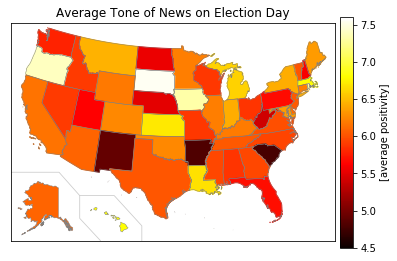

In [22]:
fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

avgtone_2008_dict = avgtone_2008.to_dict()

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot # use 'reversed hot' colormap
vmin = 4.5; vmax = 7.6 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        tone = avgtone_2008_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((tone-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Average Tone of News on Election Day')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[average positivity]')

plt.show()

In [23]:
avgtone_2016_inv = avgtone_2016 * -1
print(avgtone_2016_inv.min(), avgtone_2016_inv.max())

0.21150923 4.432151


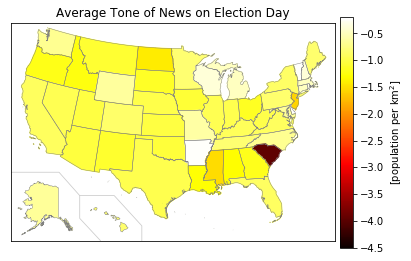

In [24]:
fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

avgtone_2016_dict = avgtone_2016.to_dict()

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot # use 'reversed hot' colormap
vmin = -4.5; vmax = -0.2 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        tone = avgtone_2016_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((tone-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Average Tone of News on Election Day')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[population per $\mathregular{km^2}$]')

plt.show()